# Fandango - Data Exploration and Analysis

Sourced from Jose Portilla - Data Science Course

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("C:/Users/Imy Hull/datasets/fandango_scrape.csv")

In [4]:
df.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [5]:
df.shape

(504, 4)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [7]:
df.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


Is there a relationship between those movies with the highest site ratings or stars and the number of votes they receive?

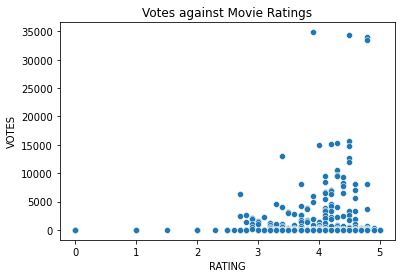

In [12]:
# Relationship between ratings and votes
sns.scatterplot(data = df, x = "RATING", y = "VOTES")
plt.title("Votes against Movie Ratings");

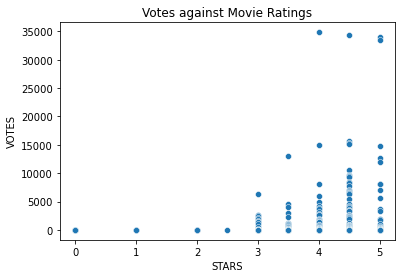

In [14]:
# Relationship between stars and votes
sns.scatterplot(data = df, x = "STARS", y = "VOTES")
plt.title("Votes against Movie Ratings");

There might be some relationship but it is difficult to tell

In [17]:
df.corr()

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


The stars and ratings are highly correlated as we would expect but not perfectly correlated

In [18]:
df.head(1)

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846


In [19]:
# Extract the year from the film column - split on opening bracket, take the last item in the list and replace the bracket
df["YEAR"] = df["FILM"].apply(lambda x: x.split('(')[-1].replace(')',""))

In [23]:
df["YEAR"].value_counts()

2015    478
2014     23
2016      1
2012      1
1964      1
Name: YEAR, dtype: int64

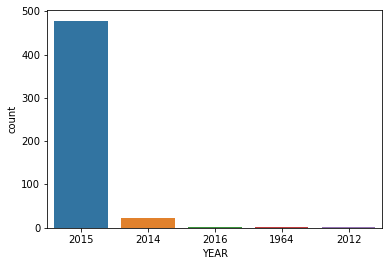

In [22]:
sns.countplot(data = df, x ="YEAR");

Most movies were released in 2015 in this dataset

In [24]:
df.head()

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015


In [28]:
# Top ten movies by votes
top_ten = df.sort_values(by = "VOTES",ascending = False).head(10) # can also use n.largest(10,"VOTES")
top_ten

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


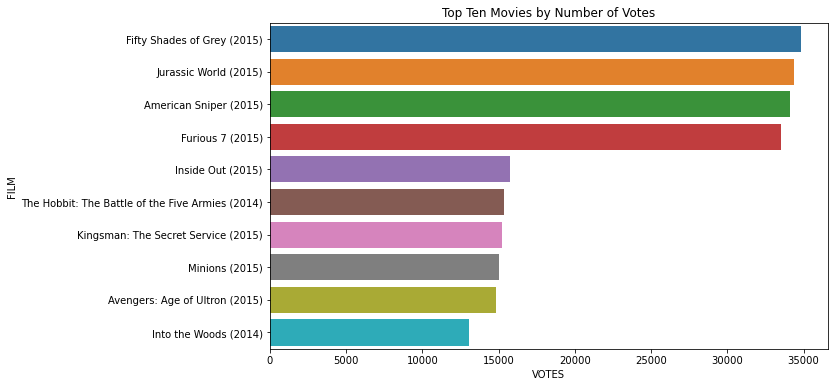

In [36]:
plt.figure(figsize = (10,6))
sns.barplot(data =top_ten, x = "VOTES", y = "FILM")
plt.title("Top Ten Movies by Number of Votes");

In [40]:
# How many of the movies have no votes at all?
df[df["VOTES"]==0]

,FILM,STARS,RATING,VOTES,YEAR
435,6 Years (2015),0.0,0.0,0,2015
436,7 Minutes (2015),0.0,0.0,0,2015
437,A Year in Champagne (2015),0.0,0.0,0,2015
438,Balls Out (2015),0.0,0.0,0,2015
439,Before I Wake (2015),0.0,0.0,0,2015
...,...,...,...,...,...
499,Valiyavan (2015),0.0,0.0,0,2015
500,WWE SummerSlam 2015 (2015),0.0,0.0,0,2015
501,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0,2015
502,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0,1964


In [42]:
films_with_votes = df[df["VOTES"]>0]
films_with_votes.shape

(435, 5)

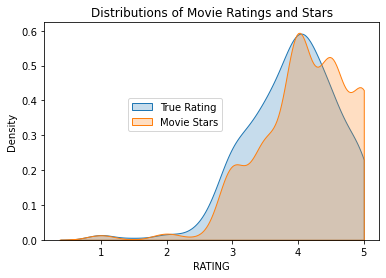

In [54]:
# Visualise how the rating differs from the star values displayed by movie
sns.kdeplot(data = films_with_votes,x = "RATING", clip = (0,5), fill= True, label = "True Rating")
sns.kdeplot(data = films_with_votes,x = "STARS", clip = (0,5), fill= True, label = "Movie Stars")
plt.title("Distributions of Movie Ratings and Stars")
plt.legend(loc = (0.25,0.5));

There appears to be a discrepancy between the true rating from user votes and the star rating being displayed by the Fandango site. The movie stars appear to be higher than ratings.

In [55]:
films_with_votes.head()

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015


In [60]:
# Get the difference between the star rating and the true rating for each film
films_with_votes["STARS DIFF"] = films_with_votes["STARS"] - films_with_votes["RATING"]
films_with_votes["STARS DIFF"] = films_with_votes["STARS DIFF"].round(2)
films_with_votes.head()

,FILM,STARS,RATING,VOTES,YEAR,STARS DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0


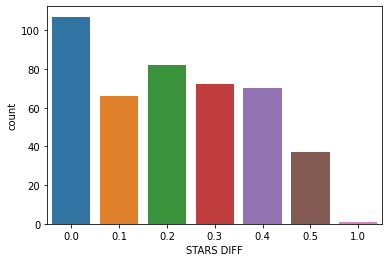

In [62]:
sns.countplot(data = films_with_votes, x ="STARS DIFF");

In most cases the star ratings do not vary from the true rating but there are some differences. One movie had a whole star difference.

In [64]:
# Find the film with a difference of one star
films_with_votes[films_with_votes["STARS DIFF"] == 1.0]

,FILM,STARS,RATING,VOTES,YEAR,STARS DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


In [69]:
films_with_votes.shape

(435, 6)

# Compare the ratings to other sites

In [65]:
df2 = pd.read_csv(("C:/Users/Imy Hull/datasets/all_sites_scores.csv"))

In [66]:
df2.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [67]:
df2.shape

(146, 8)

In [68]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.2+ KB


In [70]:
df2.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


In [72]:
df2.columns

Index(['FILM', 'RottenTomatoes', 'RottenTomatoes_User', 'Metacritic',
       'Metacritic_User', 'IMDB', 'Metacritic_user_vote_count',
       'IMDB_user_vote_count'],
      dtype='object')

## Rotten Tomatoes

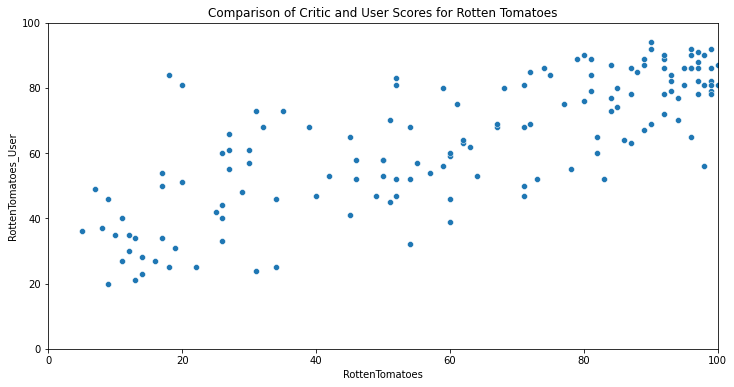

In [78]:
# Relationship between critic and user reviews
plt.figure(figsize = (12,6))
sns.scatterplot(data = df2, x = 'RottenTomatoes', y = "RottenTomatoes_User")
plt.xlim(0,100)
plt.ylim(0,100)
plt.title("Comparison of Critic and User Scores for Rotten Tomatoes");

There appears to be some linear relationship such that highly rated movies by critics are related to highly rated movies by users. There are also some outliers.

In [83]:
df2["Rotten Diff"] = df2["RottenTomatoes"] - df2["RottenTomatoes_User"]
df2.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten Diff
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14


In [84]:
# Get the mean difference - Needs to be mean absolute difference as there are positives and negatives
df2["Rotten Diff"].apply(abs).mean()

15.095890410958905

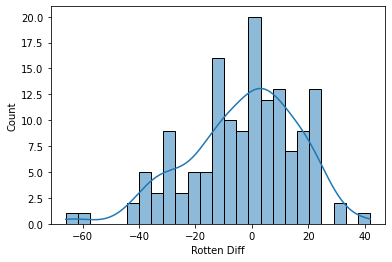

In [87]:
# Plot the differences distribution
sns.histplot(data = df2, x = "Rotten Diff", kde = True, bins = 25);

Some movies are highly negative so users have liked them better than the critics and a few highly positive which shows the reverse

In [91]:
# Which movies have the largest differences - top five movies where users rated higher than critics (largest negative)
user_favs = df2.sort_values(by = "Rotten Diff",ascending = True).head(5)
user_favs

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten Diff
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
85,Little Boy (2015),20,81,30,5.9,7.4,38,5927,-61
134,The Longest Ride (2015),31,73,33,4.8,7.2,49,25214,-42
105,Hitman: Agent 47 (2015),7,49,28,3.3,5.9,67,4260,-42
125,The Wedding Ringer (2015),27,66,35,3.3,6.7,126,37292,-39


In [92]:
# Which movies have the largest differences - top five movies where critics rated higher than users (largest positive)
critics_fav = df2.sort_values(by = "Rotten Diff", ascending = False).head(5)
critics_fav

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten Diff
69,Mr. Turner (2014),98,56,94,6.6,6.9,98,13296,42
112,It Follows (2015),96,65,83,7.5,6.9,551,64656,31
115,While We're Young (2015),83,52,76,6.7,6.4,65,17647,31
145,"Kumiko, The Treasure Hunter (2015)",87,63,68,6.4,6.7,19,5289,24
37,Welcome to Me (2015),71,47,67,6.9,5.9,33,8301,24


## MetaCritic

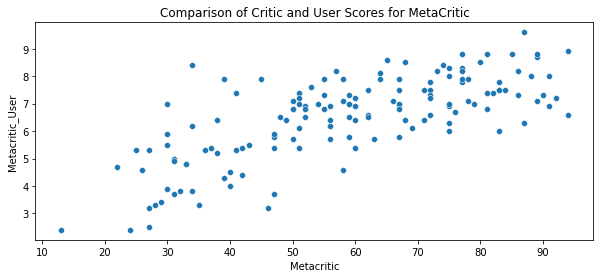

In [103]:
# Relationship between critic and user reviews
plt.figure(figsize = (10,4))
sns.scatterplot(data = df2, x = 'Metacritic', y = "Metacritic_User")
plt.title("Comparison of Critic and User Scores for MetaCritic");

Similar to Rotten Tomatoes but no obvious outliers

## IMDB

In [104]:
df2.columns

Index(['FILM', 'RottenTomatoes', 'RottenTomatoes_User', 'Metacritic',
       'Metacritic_User', 'IMDB', 'Metacritic_user_vote_count',
       'IMDB_user_vote_count', 'Rotten Diff'],
      dtype='object')

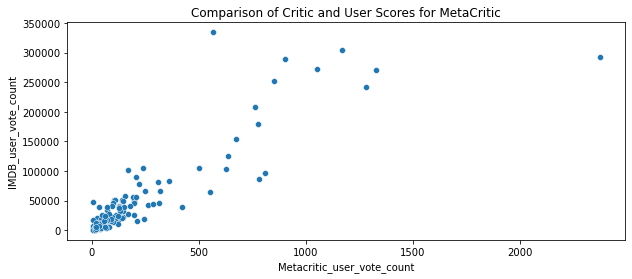

In [105]:
# Relationship between critic and user reviews
plt.figure(figsize = (10,4))
sns.scatterplot(data = df2, x = 'Metacritic_user_vote_count', y = "IMDB_user_vote_count")
plt.title("Comparison of Critic and User Scores for MetaCritic");

There are some outliers where the vote counts don't tally. The large outlier with high votes by both is what?

In [107]:
df2.nlargest(1, "IMDB_user_vote_count")

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten Diff
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2


In [108]:
# What movie has the highest metacritic
df2.nlargest(1, "Metacritic_user_vote_count")

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten Diff
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9


# Compare scores from other sites to Fandango

In [109]:
df.head()

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015


In [111]:
df2.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten Diff
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14


In [133]:
# Joint both tables
new = pd.merge(df, df2, on = "FILM", how = "inner")
new.describe().T["max"]

STARS                              5.0
RATING                             4.8
VOTES                          34846.0
RottenTomatoes                   100.0
RottenTomatoes_User               94.0
Metacritic                        94.0
Metacritic_User                    9.6
IMDB                               8.6
Metacritic_user_vote_count      2375.0
IMDB_user_vote_count          334164.0
Rotten Diff                       42.0
Name: max, dtype: float64

In [134]:
new.shape

(145, 13)

In [135]:
# Need to scale or normalise the ratings all to 0 to 5
new["RT_Norm"] = np.round(new['RottenTomatoes']/20,1)
new["RTU_Norm"] = np.round(new['RottenTomatoes_User']/20,1)
new["M_Norm"] = np.round(new['Metacritic']/20,1)
new["MU_Norm"] = np.round(new['Metacritic_User']/2,1)
new["I_Norm"] = np.round(new['IMDB']/2,1)

In [136]:
new.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten Diff,RT_Norm,RTU_Norm,M_Norm,MU_Norm,I_Norm
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8,4.9,4.5,4.7,4.4,4.3


In [141]:
new.columns

Index(['FILM', 'STARS', 'RATING', 'VOTES', 'YEAR', 'RottenTomatoes',
       'RottenTomatoes_User', 'Metacritic', 'Metacritic_User', 'IMDB',
       'Metacritic_user_vote_count', 'IMDB_user_vote_count', 'Rotten Diff',
       'RT_Norm', 'RTU_Norm', 'M_Norm', 'MU_Norm', 'I_Norm'],
      dtype='object')

In [143]:
norm = new[['STARS', 'RATING','RT_Norm', 'RTU_Norm', 'M_Norm', 'MU_Norm', 'I_Norm']]
norm.head()

,STARS,RATING,RT_Norm,RTU_Norm,M_Norm,MU_Norm,I_Norm
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,4.5,4.5,4.9,4.5,4.7,4.4,4.3


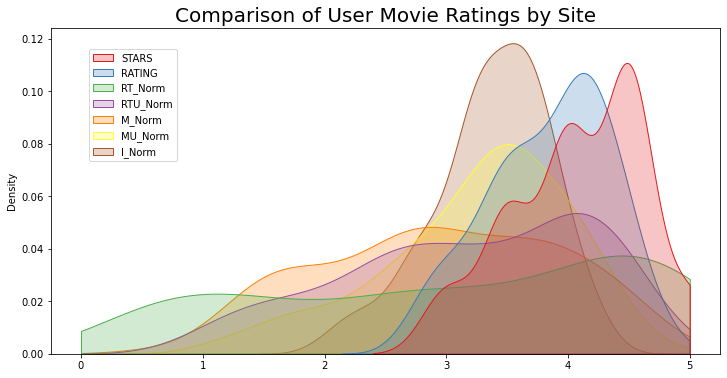

In [163]:
# Is Fandango displaying abnormally high ratings?
plt.figure(figsize = (12,6))
ax = sns.kdeplot(data = norm, shade = True, clip = (0,5), palette = 'Set1')
plt.title("Comparison of User Movie Ratings by Site",fontsize = 20)
ax.legend_.set_bbox_to_anchor((0.05, 0.95)) # Fix for bug in seaborn for locating the legend
ax.legend_._set_loc(2);

Fandango seems to have higher stars and ratings than the other sites.

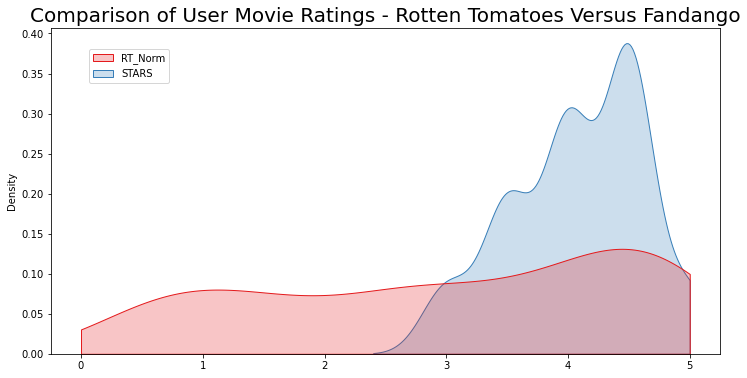

In [166]:
# Is Fandango displaying abnormally high ratings?
plt.figure(figsize = (12,6))
ax = sns.kdeplot(data = norm[["RT_Norm","STARS"]], shade = True, clip = (0,5), palette = 'Set1')
plt.title("Comparison of User Movie Ratings - Rotten Tomatoes Versus Fandango",fontsize = 20)
ax.legend_.set_bbox_to_anchor((0.05, 0.95)) # Fix for bug in seaborn for locating the legend
ax.legend_._set_loc(2);

Comparing just Rotten Tomatoes with the Fandango stars, there is an obvious large difference

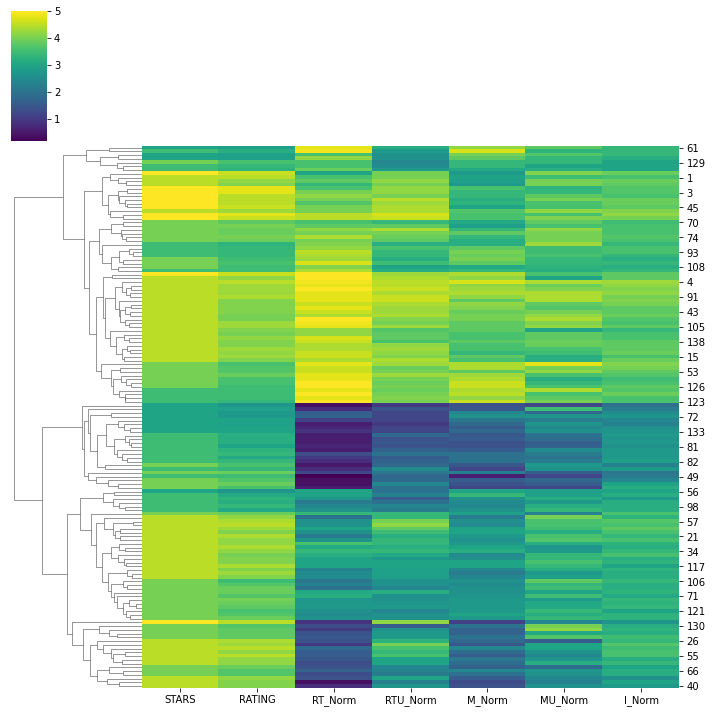

In [174]:
# All movie scores (clustering just on the ratings not the sites)
sns.clustermap(norm, cmap = "viridis", col_cluster = False);

In [176]:
new.columns

Index(['FILM', 'STARS', 'RATING', 'VOTES', 'YEAR', 'RottenTomatoes',
       'RottenTomatoes_User', 'Metacritic', 'Metacritic_User', 'IMDB',
       'Metacritic_user_vote_count', 'IMDB_user_vote_count', 'Rotten Diff',
       'RT_Norm', 'RTU_Norm', 'M_Norm', 'MU_Norm', 'I_Norm'],
      dtype='object')

In [185]:
# Find the ten worst movies and show distribution
norm_films = new[['FILM','STARS','RATING','RT_Norm', 'RTU_Norm', 'M_Norm', 'MU_Norm', 'I_Norm']]
ten_worst = norm_films.nsmallest(10,"RT_Norm")
ten_worst

,FILM,STARS,RATING,RT_Norm,RTU_Norm,M_Norm,MU_Norm,I_Norm
49,Paul Blart: Mall Cop 2 (2015),3.5,3.5,0.2,1.8,0.6,1.2,2.2
25,Taken 3 (2015),4.5,4.1,0.4,2.3,1.3,2.3,3.0
28,Fantastic Four (2015),3.0,2.7,0.4,1.0,1.4,1.2,2.0
54,Hot Pursuit (2015),4.0,3.7,0.4,1.8,1.6,1.8,2.4
84,Hitman: Agent 47 (2015),4.0,3.9,0.4,2.4,1.4,1.6,3.0
50,The Boy Next Door (2015),4.0,3.6,0.5,1.8,1.5,2.8,2.3
77,Seventh Son (2015),3.5,3.2,0.6,1.8,1.5,2.0,2.8
78,Mortdecai (2015),3.5,3.2,0.6,1.5,1.4,1.6,2.8
83,Sinister 2 (2015),3.5,3.3,0.6,1.7,1.6,2.5,2.8
87,Unfinished Business (2015),3.5,3.2,0.6,1.4,1.6,1.9,2.7


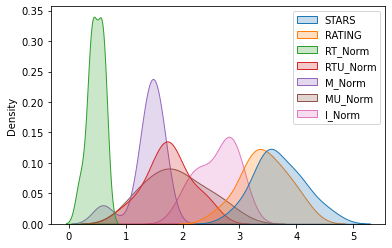

In [187]:
sns.kdeplot(data = ten_worst, shade = True);